# Stability vs genome location

Here we want to know about the relationship between stability and genome distance: Are more stable genes located in similar locations on the genome in PAO1 vs PA14 compared to least stable genes?

We hypothesize that least stable genes are not syntenic (i.e. located in different regions of the genome) across strains, which might indicate a different some transcriptional re-wiring.

There are 2 approaches we take here:
1. For each least/most stable gene, get the neighboring core/homologous genes and determine if they match between PAO1 vs PA14.
2. Scale PA14 gene ids to same range as PAO1 then take distance between PAO1 gene and homolog of PAO1 gene

https://academic.oup.com/bioinformatics/article/36/Supplement_1/i21/5870523
https://pubmed.ncbi.nlm.nih.gov/23323735/
https://arxiv.org/pdf/1307.4291.pdf

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scripts import paths, utils

random.seed(1)

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# User param
window = 2

## Load data

In [3]:
# Input similarity scores and annotations filenames
# Since the results are similar we only need to look at the scores for one strain type
pao1_similarity_filename = "pao1_core_similarity_associations_final_spell.tsv"
pa14_similarity_filename = "pa14_core_similarity_associations_final_spell.tsv"

In [4]:
# Import df
pao1_similarity = pd.read_csv(pao1_similarity_filename, sep="\t", index_col=0, header=0)
pa14_similarity = pd.read_csv(pa14_similarity_filename, sep="\t", index_col=0, header=0)

In [5]:
print(pao1_similarity.shape)
pao1_similarity.head()

(5349, 16)


,PA14 homolog id,Transcriptional similarity across strains,P-value,Name,label,mean expression,standard deviation expression,min expression,25% expression,50% expression,75% expression,max expression,variance expression,range expression,pathways present,Related acc genes
PAO1 id,,,,,,,,,,,,,,,,
PA1839,PA14_40730,0.479379,1.533344e-305,NaN,NaN,132.804962,87.734616,4.087634,73.908945,115.812474,171.017374,821.445691,7.697363e+03,817.358057,[],NaN
PA1093,PA14_50280,0.399669,2.303959e-204,NaN,NaN,999.954597,1367.391295,0.057625,280.483419,722.971734,1317.661680,22264.320777,1.869759e+06,22264.263152,[],NaN
PA1947,PA14_39330,0.384830,2.260974e-188,rbsA,NaN,312.349358,380.589548,0.209768,107.163043,191.967653,381.118755,3768.828667,1.448484e+05,3768.618898,[],NaN
PA4672,PA14_61790,0.386774,2.023694e-190,NaN,NaN,448.826146,933.567419,6.160916,84.240169,160.854155,388.313280,12997.089379,8.715481e+05,12990.928463,[],NaN
PA2251,PA14_35470,0.259699,3.537348e-83,NaN,NaN,109.288623,80.205609,0.062196,64.545999,90.854359,137.165351,652.879274,6.432940e+03,652.817078,[],NaN


In [6]:
print(pa14_similarity.shape)
pa14_similarity.head()

(5348, 16)


,PAO1 homolog id,Transcriptional similarity across strains,P-value,Name,label,mean expression,standard deviation expression,min expression,25% expression,50% expression,75% expression,max expression,variance expression,range expression,pathways present,Related acc genes
PA14 id,,,,,,,,,,,,,,,,
PA14_01690,PA0138,0.398073,1.444998e-202,NaN,NaN,48.146302,144.110331,2.170836,13.137108,23.539019,48.905936,2527.689060,2.076779e+04,2525.518223,[],NaN
PA14_05540,PA0426,0.283820,1.230401e-99,mexB,NaN,4072.376017,2557.907831,265.981640,2333.523085,3525.336963,5254.590539,18765.637983,6.542892e+06,18499.656344,['KEGG-Pathway-pae00312: beta-Lactam resistanc...,NaN
PA14_19630,PA3438,0.326167,8.899237e-133,folE1,NaN,335.208749,310.824107,13.523229,166.456655,231.032201,347.361538,2252.077923,9.661163e+04,2238.554694,"['KEGG-Pathway-pae00790: Folate biosynthesis',...",NaN
PA14_12730,PA3953,0.299629,2.300539e-111,NaN,NaN,24.353518,18.451461,2.145587,12.714652,20.589063,31.881316,248.122333,3.404564e+02,245.976746,[],NaN
PA14_69780,PA5286,0.468224,1.191668e-289,NaN,NaN,397.297338,490.418270,15.377551,112.325047,232.872707,436.557607,3209.148659,2.405101e+05,3193.771108,[],NaN


## Get most and least stable genes

In [7]:
pao1_least_stable = pao1_similarity[pao1_similarity["label"] == "least stable"].index
pao1_most_stable = pao1_similarity[pao1_similarity["label"] == "most stable"].index

## Get mapping from PAO1 to PA14 ids

In [8]:
pao1_annotation_filename = paths.GENE_PAO1_ANNOT
gene_mapping_pao1 = utils.get_pao1_pa14_gene_map(pao1_annotation_filename, "pao1")

In [9]:
gene_mapping_pao1 = gene_mapping_pao1["PA14_ID"].to_frame()

In [10]:
gene_mapping_pao1.head()

,PA14_ID
PAO1_ID,
PA0001,PA14_00010
PA0002,PA14_00020
PA0003,PA14_00030
PA0004,PA14_00050
PA0005,PA14_00060


## Approach 1

For least stable gene:
* select window of core genes
* compare sets

In [11]:
# TO DO:
# Which all core set to use
# Do this for a random set of core genes as a baseline
def test(
    pao1_core_genes_df,
    pa14_core_genes_df,
    gene_id_mapping_df,
    window_size,
    core_genes_to_examine,
):
    """
    Function that compares ...

    gene_id_mapping_df: df
        Mapping PAO1 ids to PA14 ids

    core_genes_to_examine: df
        Least or most stable core genes using PAO1 ids
    """
    # Sort to make sure core ids are in order
    pao1_core_genes_df = pao1_core_genes_df.sort_index()
    pa14_core_genes_df = pa14_core_genes_df.sort_index()

    # List of percent overlap
    percent_overlap_lst = []
    for pao1_id in core_genes_to_examine:
        print(pao1_id)

        # Get PAO1 neighboring core genes
        pao1_gene_idx = pao1_core_genes_df.index.get_loc(pao1_id)
        pao1_gene_neighborhood_ids = pao1_core_genes_df.iloc[
            pao1_gene_idx - window_size : pao1_gene_idx + window_size + 1
        ].index

        # Remove least/most stable gene
        pao1_gene_neighborhood_ids = pao1_gene_neighborhood_ids.drop(labels=pao1_id)

        print(pao1_gene_idx)
        print(pao1_gene_neighborhood_ids)

        # Map PAO1 least/most stable gene to PA14 id
        mapped_pa14_id = gene_id_mapping_df.loc[pao1_id, "PA14_ID"]
        print(mapped_pa14_id)

        # Get PA14 neighboring core genes
        pa14_gene_idx = pa14_core_genes_df.index.get_loc(mapped_pa14_id)
        pa14_gene_neighborhood_ids = pa14_core_genes_df.iloc[
            pa14_gene_idx - window_size : pa14_gene_idx + window_size + 1
        ].index

        # Remove least/most stable gene
        pa14_gene_neighborhood_ids = pa14_gene_neighborhood_ids.drop(
            labels=mapped_pa14_id
        )

        print(pa14_gene_idx)
        print(pa14_gene_neighborhood_ids)

        # Convert neighboring PAO1 ids to PA14 ids
        mapped_pao1_gene_neighborhood_ids = gene_id_mapping_df.loc[
            pao1_gene_neighborhood_ids, "PA14_ID"
        ]
        print(mapped_pao1_gene_neighborhood_ids)

        # Compare gene ids
        overlap_neighborhood_ids = set(pa14_gene_neighborhood_ids).intersection(
            set(mapped_pao1_gene_neighborhood_ids)
        )
        print("overlap", overlap_neighborhood_ids)

        # Save percent matched core genes
        percent_overlap = len(overlap_neighborhood_ids) / (2 * window_size)
        print(len(overlap_neighborhood_ids))
        percent_overlap_lst.append(percent_overlap)

    return percent_overlap_lst

In [12]:
least_matched_neighborhood = test(
    pao1_similarity, pa14_similarity, gene_mapping_pao1, window, pao1_least_stable
)

PA0711
686
Index(['PA0709', 'PA0710', 'PA0713', 'PA0714'], dtype='object', name='PAO1 id')
PA14_55117
4030
Index(['PA14_55100', 'PA14_55110', 'PA14_55130', 'PA14_55140'], dtype='object', name='PA14 id')
PAO1 id
PA0709    PA14_55140
PA0710    PA14_55130
PA0713    PA14_55110
PA0714    PA14_55100
Name: PA14_ID, dtype: object
overlap {'PA14_55110', 'PA14_55140', 'PA14_55100', 'PA14_55130'}
4
PA3230
3072
Index(['PA3228', 'PA3229', 'PA3231', 'PA3232'], dtype='object', name='PAO1 id')
PA14_22410
1654
Index(['PA14_22380', 'PA14_22400', 'PA14_22420', 'PA14_22440'], dtype='object', name='PA14 id')
PAO1 id
PA3228    PA14_22440
PA3229    PA14_22420
PA3231    PA14_22400
PA3232    PA14_22380
Name: PA14_ID, dtype: object
overlap {'PA14_22420', 'PA14_22440', 'PA14_22380', 'PA14_22400'}
4
PA2521
2399
Index(['PA2519', 'PA2520', 'PA2522', 'PA2523'], dtype='object', name='PAO1 id')
PA14_31990
2328
Index(['PA14_31960', 'PA14_31970', 'PA14_32060', 'PA14_32080'], dtype='object', name='PA14 id')
PAO1 id
PA251

Name: PA14_ID, dtype: object
overlap {'PA14_45970', 'PA14_46020', 'PA14_45980', 'PA14_46010'}
4
PA1016
982
Index(['PA1014', 'PA1015', 'PA1017', 'PA1018'], dtype='object', name='PAO1 id')
PA14_51190
3751
Index(['PA14_51160', 'PA14_51170', 'PA14_51205', 'PA14_51220'], dtype='object', name='PA14 id')
PAO1 id
PA1014    PA14_51220
PA1015    PA14_51205
PA1017    PA14_51170
PA1018    PA14_51160
Name: PA14_ID, dtype: object
overlap {'PA14_51170', 'PA14_51205', 'PA14_51220', 'PA14_51160'}
4
PA1144
1110
Index(['PA1142', 'PA1143', 'PA1145', 'PA1146'], dtype='object', name='PAO1 id')
PA14_49610
3623
Index(['PA14_49580', 'PA14_49590', 'PA14_49620', 'PA14_49630'], dtype='object', name='PA14 id')
PAO1 id
PA1142    PA14_49630
PA1143    PA14_49620
PA1145    PA14_49590
PA1146    PA14_49580
Name: PA14_ID, dtype: object
overlap {'PA14_49630', 'PA14_49580', 'PA14_49590', 'PA14_49620'}
4
PA1470
1410
Index(['PA1468', 'PA1469', 'PA1473', 'PA1474'], dtype='object', name='PAO1 id')
PA14_45430
3311
Index(['PA14_

Name: PA14_ID, dtype: object
overlap {'PA14_03210', 'PA14_03190', 'PA14_03220'}
3
PA3897
3717
Index(['PA3895', 'PA3896', 'PA3898', 'PA3899'], dtype='object', name='PAO1 id')
PA14_13490
1009
Index(['PA14_13460', 'PA14_13470', 'PA14_13500', 'PA14_13510'], dtype='object', name='PA14 id')
PAO1 id
PA3895    PA14_13510
PA3896    PA14_13500
PA3898    PA14_13470
PA3899    PA14_13460
Name: PA14_ID, dtype: object
overlap {'PA14_13500', 'PA14_13510', 'PA14_13460', 'PA14_13470'}
4
PA3964
3784
Index(['PA3962', 'PA3963', 'PA3965', 'PA3966'], dtype='object', name='PAO1 id')
PA14_12590
942
Index(['PA14_12560', 'PA14_12570', 'PA14_12610', 'PA14_12620'], dtype='object', name='PA14 id')
PAO1 id
PA3962    PA14_12620
PA3963    PA14_12610
PA3965    PA14_12570
PA3966    PA14_12560
Name: PA14_ID, dtype: object
overlap {'PA14_12570', 'PA14_12610', 'PA14_12560', 'PA14_12620'}
4
PA1960
1889
Index(['PA1958', 'PA1959', 'PA1961', 'PA1962'], dtype='object', name='PAO1 id')
PA14_39180
2835
Index(['PA14_39150', 'PA14_

In [13]:
most_matched_neighborhood = test(
    pao1_similarity, pa14_similarity, gene_mapping_pao1, window, pao1_most_stable
)

PA2366
2252
Index(['PA2364', 'PA2365', 'PA2367', 'PA2368'], dtype='object', name='PAO1 id')
PA14_34050
2473
Index(['PA14_34020', 'PA14_34030', 'PA14_34070', 'PA14_34080'], dtype='object', name='PA14 id')
PAO1 id
PA2364    PA14_34080
PA2365    PA14_34070
PA2367    PA14_34030
PA2368    PA14_34020
Name: PA14_ID, dtype: object
overlap {'PA14_34080', 'PA14_34030', 'PA14_34070', 'PA14_34020'}
4
PA3337
3179
Index(['PA3335', 'PA3336', 'PA3338', 'PA3339'], dtype='object', name='PAO1 id')
PA14_20890
1547
Index(['PA14_20870', 'PA14_20880', 'PA14_20900', 'PA14_20920'], dtype='object', name='PA14 id')
PAO1 id
PA3335    PA14_20920
PA3336    PA14_20900
PA3338    PA14_20880
PA3339    PA14_20870
Name: PA14_ID, dtype: object
overlap {'PA14_20870', 'PA14_20920', 'PA14_20880', 'PA14_20900'}
4
PA4247
4045
Index(['PA4245', 'PA4246', 'PA4248', 'PA4249'], dtype='object', name='PAO1 id')
PA14_09010
680
Index(['PA14_08990', 'PA14_09000', 'PA14_09020', 'PA14_09030'], dtype='object', name='PA14 id')
PAO1 id
PA424

Name: PA14_ID, dtype: object
overlap {'PA14_23360', 'PA14_23290', 'PA14_23320', 'PA14_23340'}
4
PA1589
1526
Index(['PA1587', 'PA1588', 'PA1590', 'PA1591'], dtype='object', name='PAO1 id')
PA14_43940
3195
Index(['PA14_43910', 'PA14_43920', 'PA14_43950', 'PA14_43970'], dtype='object', name='PA14 id')
PAO1 id
PA1587    PA14_43970
PA1588    PA14_43950
PA1590    PA14_43920
PA1591    PA14_43910
Name: PA14_ID, dtype: object
overlap {'PA14_43910', 'PA14_43950', 'PA14_43970', 'PA14_43920'}
4
PA2424
2308
Index(['PA2422', 'PA2423', 'PA2425', 'PA2426'], dtype='object', name='PAO1 id')
PA14_33280
2417
Index(['PA14_33260', 'PA14_33270', 'PA14_33290', 'PA14_33370'], dtype='object', name='PA14 id')
PAO1 id
PA2422    PA14_33370
PA2423    PA14_33290
PA2425    PA14_33270
PA2426    PA14_33260
Name: PA14_ID, dtype: object
overlap {'PA14_33260', 'PA14_33290', 'PA14_33270', 'PA14_33370'}
4
PA0097
94
Index(['PA0094', 'PA0096', 'PA0098', 'PA0099'], dtype='object', name='PAO1 id')
PA14_01180
94
Index(['PA14_011

Name: PA14_ID, dtype: object
overlap {'PA14_66910', 'PA14_66950', 'PA14_66900', 'PA14_66940'}
4
PA5027
4813
Index(['PA5025', 'PA5026', 'PA5028', 'PA5029'], dtype='object', name='PAO1 id')
PA14_66460
4812
Index(['PA14_66440', 'PA14_66450', 'PA14_66480', 'PA14_66490'], dtype='object', name='PA14 id')
PAO1 id
PA5025    PA14_66440
PA5026    PA14_66450
PA5028    PA14_66480
PA5029    PA14_66490
Name: PA14_ID, dtype: object
overlap {'PA14_66480', 'PA14_66440', 'PA14_66450', 'PA14_66490'}
4
PA3728
3550
Index(['PA3726', 'PA3727', 'PA3729', 'PA3730'], dtype='object', name='PAO1 id')
PA14_16190
1176
Index(['PA14_16160', 'PA14_16180', 'PA14_16200', 'PA14_16210'], dtype='object', name='PA14 id')
PAO1 id
PA3726    PA14_16210
PA3727    PA14_16200
PA3729    PA14_16180
PA3730    PA14_16160
Name: PA14_ID, dtype: object
overlap {'PA14_16160', 'PA14_16200', 'PA14_16180', 'PA14_16210'}
4
PA1658
1595
Index(['PA1656', 'PA1657', 'PA1659', 'PA1660'], dtype='object', name='PAO1 id')
PA14_43030
3126
Index(['PA14

Name: PA14_ID, dtype: object
overlap {'PA14_47400', 'PA14_47410', 'PA14_47370', 'PA14_47380'}
4
PA2152
2070
Index(['PA2150', 'PA2151', 'PA2153', 'PA2154'], dtype='object', name='PAO1 id')
PA14_36730
2653
Index(['PA14_36700', 'PA14_36710', 'PA14_36740', 'PA14_36760'], dtype='object', name='PA14 id')
PAO1 id
PA2150    PA14_36760
PA2151    PA14_36740
PA2153    PA14_36710
PA2154    PA14_36700
Name: PA14_ID, dtype: object
overlap {'PA14_36710', 'PA14_36740', 'PA14_36760', 'PA14_36700'}
4
PA0089
87
Index(['PA0087', 'PA0088', 'PA0090', 'PA0091'], dtype='object', name='PAO1 id')
PA14_01080
87
Index(['PA14_01060', 'PA14_01070', 'PA14_01100', 'PA14_01110'], dtype='object', name='PA14 id')
PAO1 id
PA0087    PA14_01060
PA0088    PA14_01070
PA0090    PA14_01100
PA0091    PA14_01110
Name: PA14_ID, dtype: object
overlap {'PA14_01110', 'PA14_01060', 'PA14_01100', 'PA14_01070'}
4
PA1596
1533
Index(['PA1594', 'PA1595', 'PA1597', 'PA1598'], dtype='object', name='PAO1 id')
PA14_43850
3188
Index(['PA14_438

Name: PA14_ID, dtype: object
overlap {'PA14_51890', 'PA14_51900', 'PA14_51930', 'PA14_51920'}
4
PA3691
3514
Index(['PA3689', 'PA3690', 'PA3692', 'PA3693'], dtype='object', name='PAO1 id')
PA14_16640
1212
Index(['PA14_16620', 'PA14_16630', 'PA14_16660', 'PA14_16670'], dtype='object', name='PA14 id')
PAO1 id
PA3689    PA14_16670
PA3690    PA14_16660
PA3692    PA14_16630
PA3693    PA14_16620
Name: PA14_ID, dtype: object
overlap {'PA14_16630', 'PA14_16620', 'PA14_16660', 'PA14_16670'}
4
PA4560
4352
Index(['PA4558', 'PA4559', 'PA4561', 'PA4562'], dtype='object', name='PAO1 id')
PA14_60370
4351
Index(['PA14_60350', 'PA14_60360', 'PA14_60380', 'PA14_60390'], dtype='object', name='PA14 id')
PAO1 id
PA4558    PA14_60350
PA4559    PA14_60360
PA4561    PA14_60380
PA4562    PA14_60390
Name: PA14_ID, dtype: object
overlap {'PA14_60360', 'PA14_60390', 'PA14_60350', 'PA14_60380'}
4
PA0093
91
Index(['PA0091', 'PA0092', 'PA0094', 'PA0096'], dtype='object', name='PAO1 id')
PA14_01140
91
Index(['PA14_011

In [14]:
# Random set of genes
random_gene_set = pao1_similarity.sample(len(pao1_least_stable)).index
random_matched_neighborhood = test(
    pao1_similarity, pa14_similarity, gene_mapping_pao1, window, random_gene_set
)

PA0319
304
Index(['PA0317', 'PA0318', 'PA0320', 'PA0321'], dtype='object', name='PAO1 id')
PA14_04160
306
Index(['PA14_04140', 'PA14_04150', 'PA14_04180', 'PA14_04190'], dtype='object', name='PA14 id')
PAO1 id
PA0317    PA14_04140
PA0318    PA14_04150
PA0320    PA14_04180
PA0321    PA14_04190
Name: PA14_ID, dtype: object
overlap {'PA14_04140', 'PA14_04180', 'PA14_04190', 'PA14_04150'}
4
PA2330
2220
Index(['PA2328', 'PA2329', 'PA2331', 'PA2332'], dtype='object', name='PAO1 id')
PA14_34490
2505
Index(['PA14_34450', 'PA14_34460', 'PA14_34500', 'PA14_34510'], dtype='object', name='PA14 id')
PAO1 id
PA2328    PA14_34510
PA2329    PA14_34500
PA2331    PA14_34460
PA2332    PA14_34450
Name: PA14_ID, dtype: object
overlap {'PA14_34510', 'PA14_34460', 'PA14_34450', 'PA14_34500'}
4
PA1885
1821
Index(['PA1883', 'PA1884', 'PA1886', 'PA1887'], dtype='object', name='PAO1 id')
PA14_40130
2900
Index(['PA14_40110', 'PA14_40120', 'PA14_40150', 'PA14_40160'], dtype='object', name='PA14 id')
PAO1 id
PA1883

Name: PA14_ID, dtype: object
overlap {'PA14_23130', 'PA14_23120', 'PA14_23090', 'PA14_23100'}
4
PA2313
2204
Index(['PA2311', 'PA2312', 'PA2314', 'PA2315'], dtype='object', name='PAO1 id')
PA14_34720
2521
Index(['PA14_34700', 'PA14_34710', 'PA14_34730', 'PA14_34740'], dtype='object', name='PA14 id')
PAO1 id
PA2311    PA14_34740
PA2312    PA14_34730
PA2314    PA14_34710
PA2315    PA14_34700
Name: PA14_ID, dtype: object
overlap {'PA14_34730', 'PA14_34740', 'PA14_34700', 'PA14_34710'}
4
PA4749
4538
Index(['PA4747', 'PA4748', 'PA4750', 'PA4751'], dtype='object', name='PAO1 id')
PA14_62840
4537
Index(['PA14_62810', 'PA14_62830', 'PA14_62850', 'PA14_62860'], dtype='object', name='PA14 id')
PAO1 id
PA4747    PA14_62810
PA4748    PA14_62830
PA4750    PA14_62850
PA4751    PA14_62860
Name: PA14_ID, dtype: object
overlap {'PA14_62810', 'PA14_62860', 'PA14_62850', 'PA14_62830'}
4
PA1923
1856
Index(['PA1921', 'PA1922', 'PA1924', 'PA1925'], dtype='object', name='PAO1 id')
PA14_39640
2867
Index(['PA14

Name: PA14_ID, dtype: object
overlap {'PA14_37650', 'PA14_37590', 'PA14_37640', 'PA14_37610'}
4
PA0268
253
Index(['PA0266', 'PA0267', 'PA0269', 'PA0270'], dtype='object', name='PAO1 id')
PA14_03480
255
Index(['PA14_03450', 'PA14_03470', 'PA14_03490', 'PA14_03510'], dtype='object', name='PA14 id')
PAO1 id
PA0266    PA14_03450
PA0267    PA14_03470
PA0269    PA14_03490
PA0270    PA14_03510
Name: PA14_ID, dtype: object
overlap {'PA14_03450', 'PA14_03470', 'PA14_03510', 'PA14_03490'}
4
PA0613
593
Index(['PA0611', 'PA0612', 'PA0614', 'PA0615'], dtype='object', name='PAO1 id')
PA14_07980
595
Index(['PA14_07960', 'PA14_07970', 'PA14_07990', 'PA14_08000'], dtype='object', name='PA14 id')
PAO1 id
PA0611    PA14_07960
PA0612    PA14_07970
PA0614    PA14_07990
PA0615    PA14_08000
Name: PA14_ID, dtype: object
overlap {'PA14_07960', 'PA14_08000', 'PA14_07970', 'PA14_07990'}
4
PA5271
5050
Index(['PA5269', 'PA5270', 'PA5272', 'PA5273'], dtype='object', name='PAO1 id')
PA14_69600
5049
Index(['PA14_695

Name: PA14_ID, dtype: object
overlap {'PA14_22560', 'PA14_22470', 'PA14_22490', 'PA14_22460'}
4
PA3901
3721
Index(['PA3899', 'PA3900', 'PA3902', 'PA3903'], dtype='object', name='PAO1 id')
PA14_13430
1005
Index(['PA14_13410', 'PA14_13420', 'PA14_13450', 'PA14_13460'], dtype='object', name='PA14 id')
PAO1 id
PA3899    PA14_13460
PA3900    PA14_13450
PA3902    PA14_13420
PA3903    PA14_13410
Name: PA14_ID, dtype: object
overlap {'PA14_13450', 'PA14_13460', 'PA14_13420', 'PA14_13410'}
4
PA3332
3174
Index(['PA3330', 'PA3331', 'PA3333', 'PA3334'], dtype='object', name='PAO1 id')
PA14_20960
1552
Index(['PA14_20940', 'PA14_20950', 'PA14_20970', 'PA14_20980'], dtype='object', name='PA14 id')
PAO1 id
PA3330    PA14_20980
PA3331    PA14_20970
PA3333    PA14_20950
PA3334    PA14_20940
Name: PA14_ID, dtype: object
overlap {'PA14_20940', 'PA14_20980', 'PA14_20950', 'PA14_20970'}
4
PA5537
5316
Index(['PA5535', 'PA5536', 'PA5538', 'PA5539'], dtype='object', name='PAO1 id')
PA14_73030
5315
Index(['PA14

Name: PA14_ID, dtype: object
overlap {'PA14_33150', 'PA14_33110', 'PA14_33080', 'PA14_33130'}
4
PA2344
2230
Index(['PA2342', 'PA2343', 'PA2345', 'PA2346'], dtype='object', name='PAO1 id')
PA14_34340
2495
Index(['PA14_34320', 'PA14_34330', 'PA14_34350', 'PA14_34360'], dtype='object', name='PA14 id')
PAO1 id
PA2342    PA14_34360
PA2343    PA14_34350
PA2345    PA14_34330
PA2346    PA14_34320
Name: PA14_ID, dtype: object
overlap {'PA14_34360', 'PA14_34320', 'PA14_34330', 'PA14_34350'}
4
PA2564
2442
Index(['PA2562', 'PA2563', 'PA2565', 'PA2566'], dtype='object', name='PAO1 id')
PA14_31370
2285
Index(['PA14_31350', 'PA14_31360', 'PA14_31380', 'PA14_31390'], dtype='object', name='PA14 id')
PAO1 id
PA2562    PA14_31390
PA2563    PA14_31380
PA2565    PA14_31360
PA2566    PA14_31350
Name: PA14_ID, dtype: object
overlap {'PA14_31350', 'PA14_31380', 'PA14_31390', 'PA14_31360'}
4
PA5506
5285
Index(['PA5504', 'PA5505', 'PA5507', 'PA5508'], dtype='object', name='PAO1 id')
PA14_72650
5284
Index(['PA14

In [15]:
least_matched_neighborhood

[1.0,
 1.0,
 0.75,
 0.0,
 0.75,
 1.0,
 0.0,
 0.25,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.75,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.75,
 1.0,
 1.0,
 1.0,
 1.0,
 0.75,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.75,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.75,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.75,
 1.0,
 0.25,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.75,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 0.75,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [16]:
most_matched_neighborhood

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.75,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.

## Approach 2

In [17]:
# Approach 2
# Calculate distance for all least/most genes
# Compare sets

In [18]:
def test2(
    pao1_core_genes_df,
    pa14_core_genes_df,
    gene_id_mapping_df,
    window_size,
    core_genes_to_examine,
):
    """
    Function that compares ...

    gene_id_mapping_df: df
        Mapping PAO1 ids to PA14 ids

    core_genes_to_examine: df
        Least or most stable core genes using PAO1 ids
    """
    diff_lst = []

    # Sort to make sure core ids are in order
    pao1_core_genes_df = pao1_core_genes_df.sort_index()
    pa14_core_genes_df = pa14_core_genes_df.sort_index()

    # Get number corresponding to PA id and scale to be between 0 - 1
    pao1_core_genes_df["PAO1_num"] = (
        pao1_core_genes_df.index.str.split("PA").str[-1].astype("float")
    )
    pao1_core_genes_df["PAO1_scaled"] = pao1_core_genes_df["PAO1_num"] / max(
        pao1_core_genes_df["PAO1_num"]
    )

    pa14_core_genes_df["PA14_num"] = (
        pa14_core_genes_df.index.str.split("PA14_").str[-1].astype("float")
    )
    pa14_core_genes_df["PA14_scaled"] = pa14_core_genes_df["PA14_num"] / max(
        pa14_core_genes_df["PA14_num"]
    )

    print(pao1_core_genes_df.head())
    print(pao1_core_genes_df.tail())

    print(pa14_core_genes_df.head())
    print(pa14_core_genes_df.tail())

    # Calculate the distance between most/least stable genes in PAO1 vs PA14
    # using scaled location
    for pao1_id in core_genes_to_examine:
        print(pao1_id)

        pao1_loc = pao1_core_genes_df.loc[pao1_id, "PAO1_scaled"]

        # Map PAO1 least/most stable gene to PA14 id
        mapped_pa14_id = gene_id_mapping_df.loc[pao1_id, "PA14_ID"]
        print(mapped_pa14_id)

        pa14_loc = pa14_core_genes_df.loc[mapped_pa14_id, "PA14_scaled"]

        # Calculate the difference
        pao1_vs_pa14_loc = abs(pao1_loc - pa14_loc)

        diff_lst.append(pao1_vs_pa14_loc)

    return diff_lst

In [19]:
pao1_least_dist = test2(
    pao1_similarity, pa14_similarity, gene_mapping_pao1, window, pao1_least_stable
)

        PA14 homolog id  Transcriptional similarity across strains  \
PAO1 id                                                              
PA0001       PA14_00010                                   0.415843   
PA0002       PA14_00020                                   0.515391   
PA0003       PA14_00030                                   0.381554   
PA0004       PA14_00050                                   0.511665   
PA0005       PA14_00060                                   0.339924   

               P-value  Name label  mean expression  \
PAO1 id                                               
PA0001   9.414552e-223  dnaA   NaN      2296.525111   
PA0002    0.000000e+00  dnaN   NaN      1766.285924   
PA0003   5.955202e-185  recF   NaN      1373.079841   
PA0004    0.000000e+00  gyrB   NaN      3440.143378   
PA0005   8.696351e-145  lptA   NaN       276.675124   

         standard deviation expression  min expression  25% expression  \
PAO1 id                                          

In [20]:
pao1_most_dist = test2(
    pao1_similarity, pa14_similarity, gene_mapping_pao1, window, pao1_most_stable
)

        PA14 homolog id  Transcriptional similarity across strains  \
PAO1 id                                                              
PA0001       PA14_00010                                   0.415843   
PA0002       PA14_00020                                   0.515391   
PA0003       PA14_00030                                   0.381554   
PA0004       PA14_00050                                   0.511665   
PA0005       PA14_00060                                   0.339924   

               P-value  Name label  mean expression  \
PAO1 id                                               
PA0001   9.414552e-223  dnaA   NaN      2296.525111   
PA0002    0.000000e+00  dnaN   NaN      1766.285924   
PA0003   5.955202e-185  recF   NaN      1373.079841   
PA0004    0.000000e+00  gyrB   NaN      3440.143378   
PA0005   8.696351e-145  lptA   NaN       276.675124   

         standard deviation expression  min expression  25% expression  \
PAO1 id                                          

In [21]:
pao1_random_dist = test2(
    pao1_similarity, pa14_similarity, gene_mapping_pao1, window, random_gene_set
)

        PA14 homolog id  Transcriptional similarity across strains  \
PAO1 id                                                              
PA0001       PA14_00010                                   0.415843   
PA0002       PA14_00020                                   0.515391   
PA0003       PA14_00030                                   0.381554   
PA0004       PA14_00050                                   0.511665   
PA0005       PA14_00060                                   0.339924   

               P-value  Name label  mean expression  \
PAO1 id                                               
PA0001   9.414552e-223  dnaA   NaN      2296.525111   
PA0002    0.000000e+00  dnaN   NaN      1766.285924   
PA0003   5.955202e-185  recF   NaN      1373.079841   
PA0004    0.000000e+00  gyrB   NaN      3440.143378   
PA0005   8.696351e-145  lptA   NaN       276.675124   

         standard deviation expression  min expression  25% expression  \
PAO1 id                                          

PA3823
PA14_14600
PA0091
PA14_01110
PA0097
PA14_01180
PA3087
PA14_24230
PA5452
PA14_71970
PA3545
PA14_18500
PA0329
PA14_04300
PA2034
PA14_38210
PA0757
PA14_54500
PA0359
PA14_04690
PA2368
PA14_34020
PA2306
PA14_34800
PA4130
PA14_10550
PA5243
PA14_69240
PA2391
PA14_33750
PA2066
PA14_37780
PA5172
PA14_68340
PA1481
PA14_45300
PA4943
PA14_65300
PA0113
PA14_01380
PA0720
PA14_48970
PA4250
PA14_08980
PA2907
PA14_26480
PA1017
PA14_51170
PA2087
PA14_37520
PA0979
PA14_51620
PA0368
PA14_04840
PA1209
PA14_48660
PA0387
PA14_05050
PA2846
PA14_27280
PA0569
PA14_07400
PA4280
PA14_08620
PA2872
PA14_26940
PA1185
PA14_49100
PA3766
PA14_15700
PA1360
PA14_46700
PA0887
PA14_52800
PA0417
PA14_05430
PA3436
PA14_19650
PA4756
PA14_62910
PA1477
PA14_45350
PA2444
PA14_33010
PA1405
PA14_46270
PA0795
PA14_53950
PA3000
PA14_25270
PA4305
PA14_55930
PA2079
PA14_37630
PA0268
PA14_03480
PA0613
PA14_07980
PA5271
PA14_69600
PA3163
PA14_23320
PA4480
PA14_58130
PA1852
PA14_40560
PA4663
PA14_61670
PA3517
PA14_18830
PA4636
PA1

## Plot

No handles with labels found to put in legend.


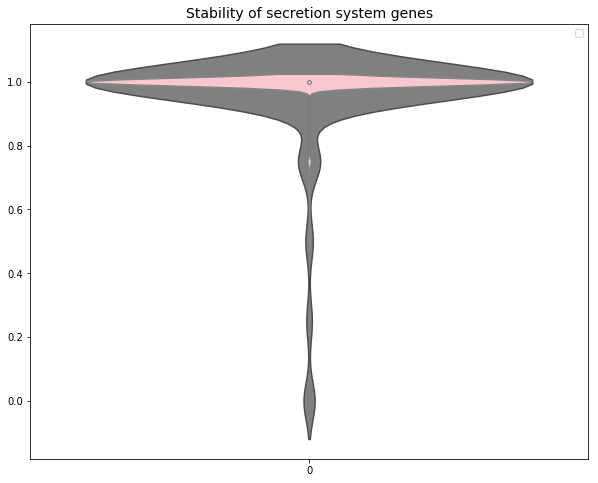

In [22]:
plt.figure(figsize=(10, 8))
sns.violinplot(data=least_matched_neighborhood, color="grey")
sns.violinplot(data=most_matched_neighborhood, color="blue")
sns.violinplot(data=random_matched_neighborhood, color="pink")

plt.title("Stability of secretion system genes", fontsize=14)
plt.legend()

No handles with labels found to put in legend.


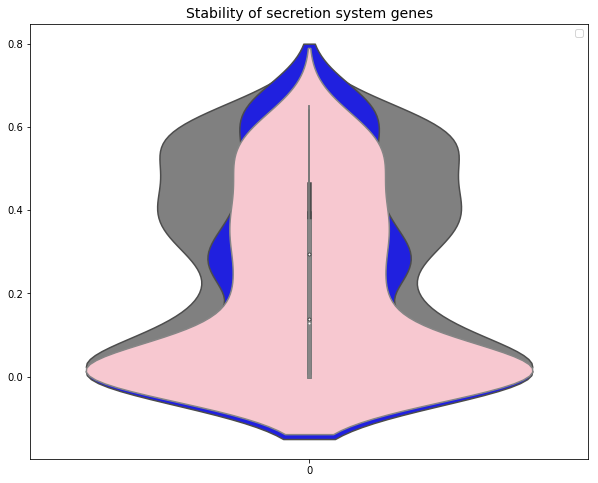

In [23]:
plt.figure(figsize=(10, 8))
sns.violinplot(data=pao1_least_dist, color="grey")
sns.violinplot(data=pao1_most_dist, color="blue")
sns.violinplot(data=pao1_random_dist, color="pink")

plt.title("Stability of secretion system genes", fontsize=14)
plt.legend()

In [24]:
# TO DO
# Check which core genes to start with
# Check calculations for Approach 1, control?
# Check calculations for Approach 2, control?
# Fix plotting
# Synteny calculations lookup